# Task 1: Feed-forward neural networks


---

Tutorial: "Machine Learning in Solid Mechanics @ Cyber-Physical Simulation, TU Darmstadt

Lecturer: Prof. Oliver Weeger

Assistants: Dominik K. Klein, Jasper O. Schommartz

Winter term 2024 / 2025


---





*Run the following cell to clone the GitHub repository in your current Google Colab environment.*

In [1]:
!git clone https://github.com/CPShub/TutorialMLinSolidMechanics.git

Cloning into 'TutorialMLinSolidMechanics'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 209 (delta 29), reused 60 (delta 15), pack-reused 128 (from 1)
Receiving objects: 100% (209/209), 6.74 MiB | 11.36 MiB/s, done.
Resolving deltas: 100% (33/33), done.


*Run the following cell to import all modules and python files to this notebook. If you made changes in the python files, run the following cell again to update the python files in this notebook. You might need to restart your Colab session first ("Runtime / Restart session" in the header menu).*

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
import datetime
now = datetime.datetime.now

import importlib

# %% Own modules
import data_f1 as ld1
importlib.reload(ld1)
import data_f2 as ld2
importlib.reload(ld2)
import models_ffnn as lm_ffnn
importlib.reload(lm_ffnn)
import models_icnn as lm_icnn
importlib.reload(lm_icnn)

<module 'models_icnn' from 'f:\\CPShub\\TutorialMLinSolidMechanics\\Winter_term_24_25\\FFNN_introduction_2.2\\models_icnn.py'>

*If you want to clone the repository again, you have to delete it from your Google Colab files first. For this, you can run the following cell.*

### Load data and model

In [2]:
model_ffnn = lm_ffnn.main()
model_icnn = lm_icnn.main()
xs_1, ys_1, xs_c_1, ys_c_1, x_grid_1, y_grid_1 = ld1.bathtub()
xs_2, ys_2, xs_c_2, ys_c_2, x_grid_2, y_grid_2 = ld2.bathtub()
model_ffnn.summary()
model_icnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 private_x_to_y (_x_to_y)    (None, 1)                 337       
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 private_x_to_y_1 (_x_to_y)  (None, 1)                 337       
                                                                 
Total params: 337
Trainable params: 337
Non-tr

## FFNN

### Model calibration for f1

2024-11-04 18:35:59.847658
Epoch 1/2000
10/10 - 1s - loss: 60.8926 - 991ms/epoch - 99ms/step
Epoch 2/2000
10/10 - 0s - loss: 60.2013 - 27ms/epoch - 3ms/step
Epoch 3/2000
10/10 - 0s - loss: 59.7116 - 29ms/epoch - 3ms/step
Epoch 4/2000
10/10 - 0s - loss: 59.1822 - 26ms/epoch - 3ms/step
Epoch 5/2000
10/10 - 0s - loss: 58.5979 - 27ms/epoch - 3ms/step
Epoch 6/2000
10/10 - 0s - loss: 57.9422 - 26ms/epoch - 3ms/step
Epoch 7/2000
10/10 - 0s - loss: 57.1574 - 25ms/epoch - 2ms/step
Epoch 8/2000
10/10 - 0s - loss: 56.1894 - 26ms/epoch - 3ms/step
Epoch 9/2000
10/10 - 0s - loss: 55.0272 - 25ms/epoch - 3ms/step
Epoch 10/2000
10/10 - 0s - loss: 53.6317 - 29ms/epoch - 3ms/step
Epoch 11/2000
10/10 - 0s - loss: 51.9269 - 26ms/epoch - 3ms/step
Epoch 12/2000
10/10 - 0s - loss: 49.7166 - 26ms/epoch - 3ms/step
Epoch 13/2000
10/10 - 0s - loss: 47.1420 - 27ms/epoch - 3ms/step
Epoch 14/2000
10/10 - 0s - loss: 44.1774 - 28ms/epoch - 3ms/step
Epoch 15/2000
10/10 - 0s - loss: 40.4522 - 30ms/epoch - 3ms/step
Epoch

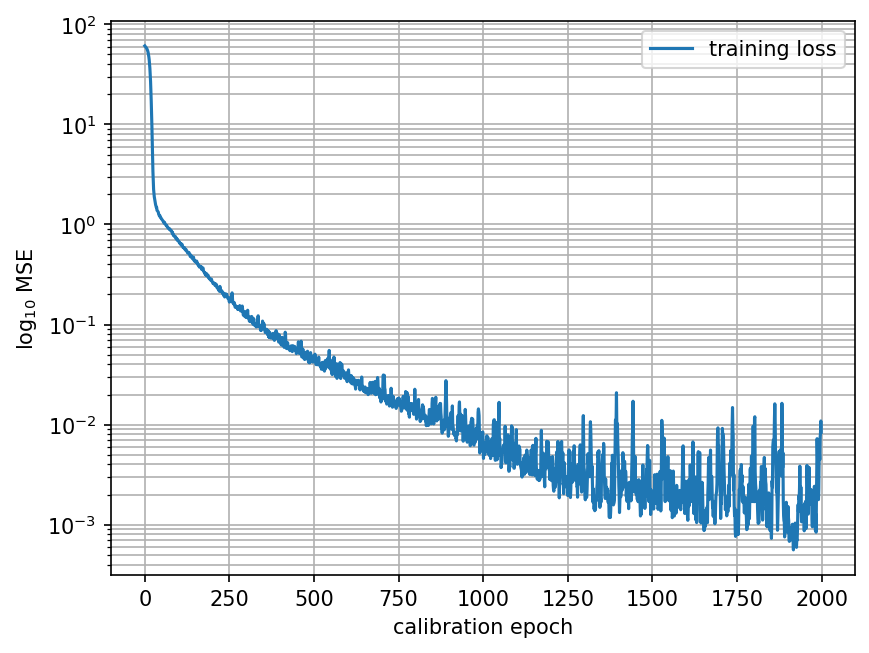

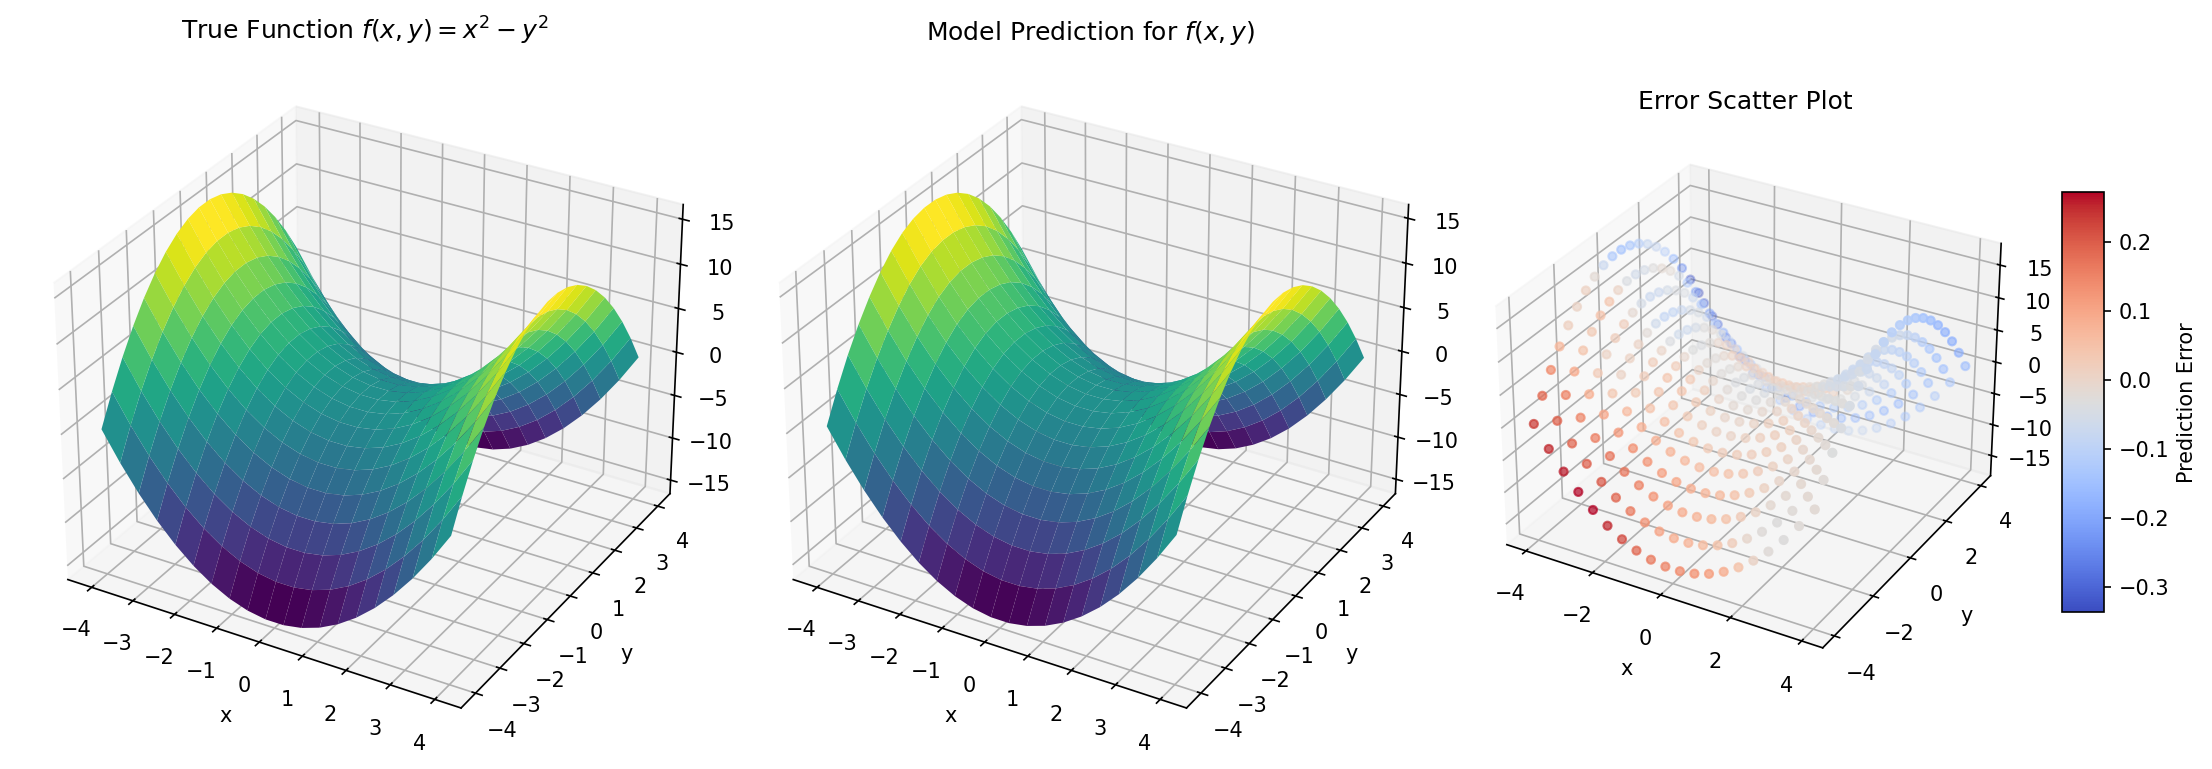

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

t1 = now()
print(t1)

model_ffnn.optimizer.learning_rate.assign(0.002)
h = model_ffnn.fit(xs_c_1, ys_c_1, epochs=2000,verbose = 2)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

# plot some results
plt.figure(1, dpi=150)
plt.semilogy(h.history['loss'], label='training loss')
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('log$_{10}$ MSE')
plt.legend()

fig = plt.figure(figsize=(15, 5), dpi=150)


ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(x_grid_1, y_grid_1, ys_1.numpy().reshape(x_grid_1.shape), cmap='viridis')
ax1.set_title('True Function $f(x, y) = x^2 - y^2$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('$f(x, y)$')


ax2 = fig.add_subplot(1, 3, 2, projection='3d')
predicted_ys = model_ffnn.predict(xs_1)
predicted_grid = predicted_ys.reshape(x_grid_1.shape)
ax2.plot_surface(x_grid_1, y_grid_1, predicted_grid, cmap='viridis')
ax2.set_title('Model Prediction for $f(x, y)$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('$f(x, y)$')


ax3 = fig.add_subplot(1, 3, 3, projection='3d')
predicted_ys = predicted_ys.flatten()
true_ys = ys_1.numpy().flatten()
errors = predicted_ys - true_ys


scatter = ax3.scatter(xs_1[:, 0], xs_1[:, 1], true_ys, c=errors, cmap='coolwarm', s=15)
ax3.set_title('Error Scatter Plot')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('True $f(x, y)$')


cbar = fig.colorbar(scatter, ax=ax3, shrink=0.6, aspect=10)
cbar.set_label('Prediction Error')


plt.tight_layout()
plt.show()


### Model calibration for f2

2024-11-04 12:16:31.883799
Epoch 1/1000
10/10 - 0s - loss: 0.0031 - 50ms/epoch - 5ms/step
Epoch 2/1000
10/10 - 0s - loss: 0.0022 - 37ms/epoch - 4ms/step
Epoch 3/1000
10/10 - 0s - loss: 0.0041 - 46ms/epoch - 5ms/step
Epoch 4/1000
10/10 - 0s - loss: 0.0030 - 44ms/epoch - 4ms/step
Epoch 5/1000
10/10 - 0s - loss: 0.0025 - 41ms/epoch - 4ms/step
Epoch 6/1000
10/10 - 0s - loss: 0.0017 - 39ms/epoch - 4ms/step
Epoch 7/1000
10/10 - 0s - loss: 0.0020 - 48ms/epoch - 5ms/step
Epoch 8/1000
10/10 - 0s - loss: 0.0024 - 40ms/epoch - 4ms/step
Epoch 9/1000
10/10 - 0s - loss: 0.0024 - 37ms/epoch - 4ms/step
Epoch 10/1000
10/10 - 0s - loss: 0.0026 - 29ms/epoch - 3ms/step
Epoch 11/1000
10/10 - 0s - loss: 0.0029 - 35ms/epoch - 3ms/step
Epoch 12/1000
10/10 - 0s - loss: 0.0024 - 31ms/epoch - 3ms/step
Epoch 13/1000
10/10 - 0s - loss: 0.0028 - 29ms/epoch - 3ms/step
Epoch 14/1000
10/10 - 0s - loss: 0.0029 - 34ms/epoch - 3ms/step
Epoch 15/1000
10/10 - 0s - loss: 0.0034 - 39ms/epoch - 4ms/step
Epoch 16/1000
10/10 - 

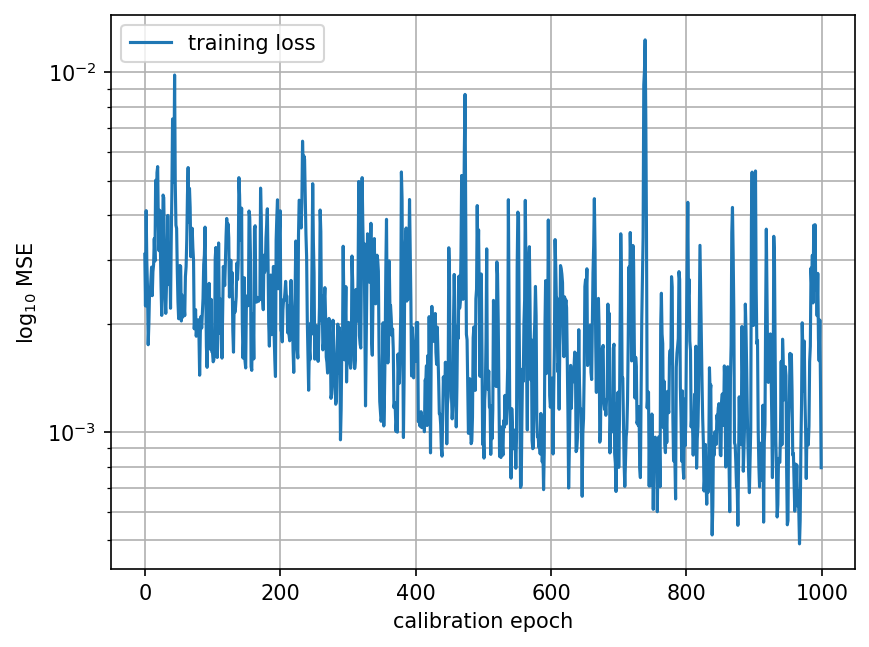

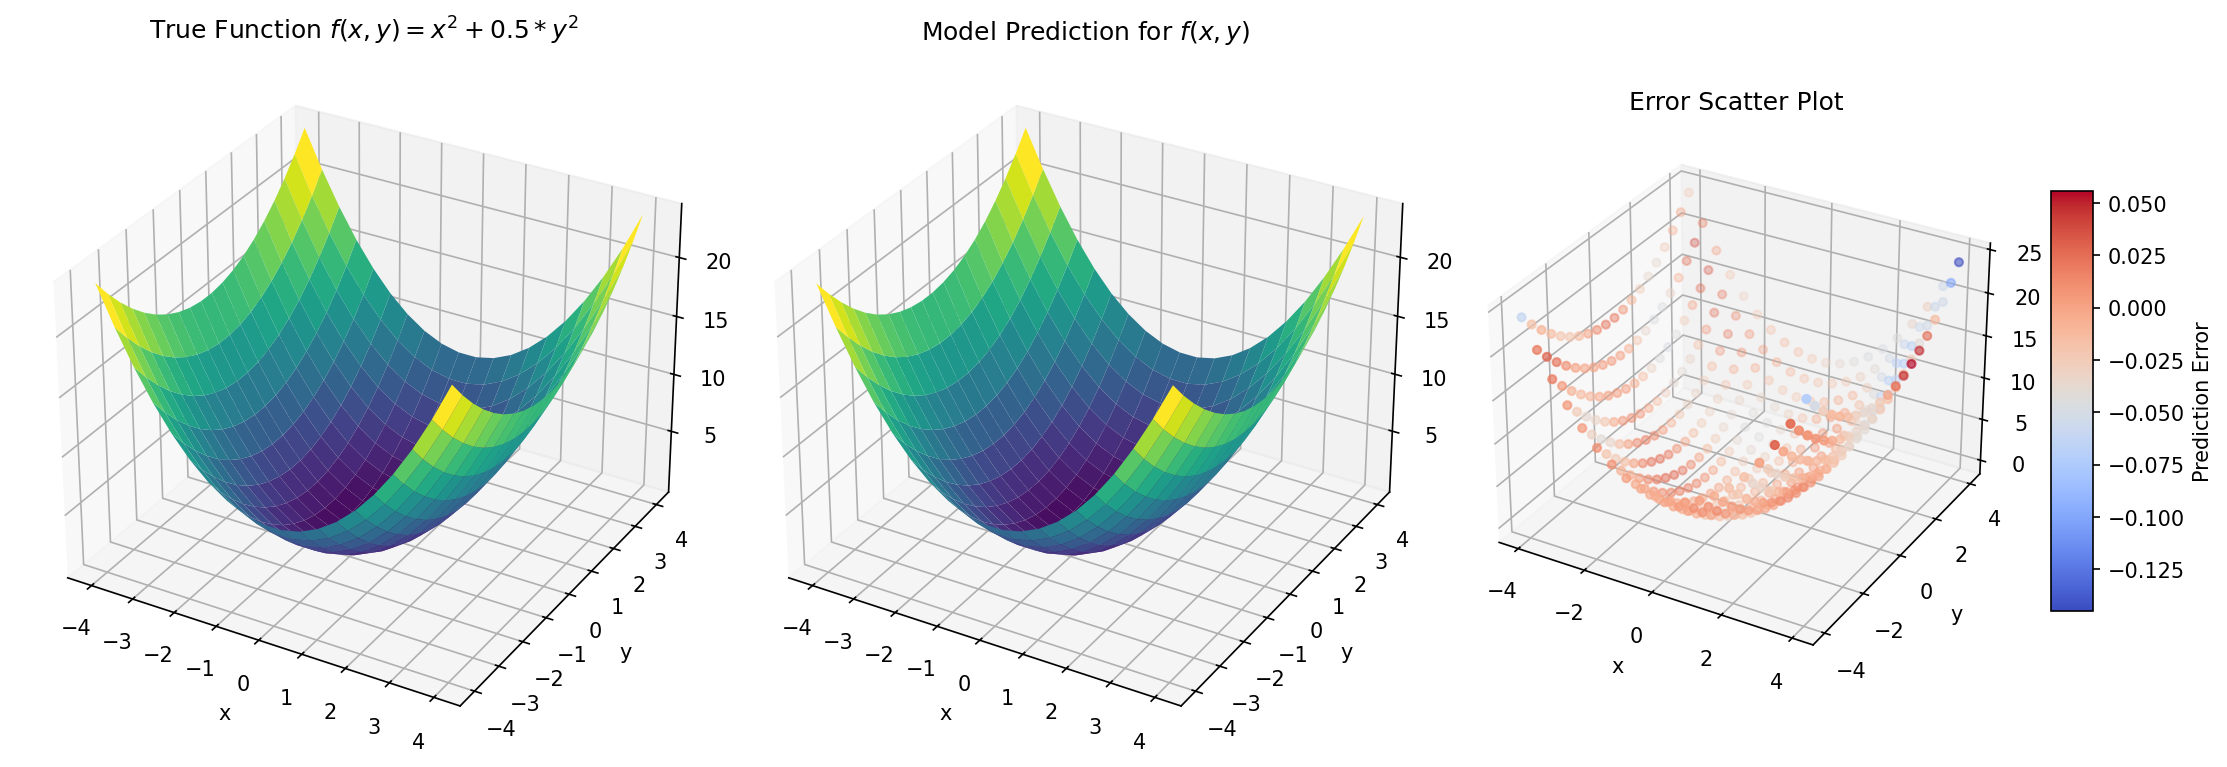

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

t1 = now()
print(t1)

model_ffnn.optimizer.learning_rate.assign(0.002)
h = model_ffnn.fit(xs_c_2, ys_c_2, epochs=2000,verbose = 2)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

# plot some results
plt.figure(1, dpi=150)
plt.semilogy(h.history['loss'], label='training loss')
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('log$_{10}$ MSE')
plt.legend()

fig = plt.figure(figsize=(15, 5), dpi=150)


ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(x_grid_2, y_grid_2, ys_2.numpy().reshape(x_grid_2.shape), cmap='viridis')
ax1.set_title('True Function $f(x, y) = x^2 + 0.5*y^2$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('$f(x, y)$')


ax2 = fig.add_subplot(1, 3, 2, projection='3d')
predicted_ys = model_ffnn.predict(xs_2)
predicted_grid = predicted_ys.reshape(x_grid_2.shape)
ax2.plot_surface(x_grid_2, y_grid_2, predicted_grid, cmap='viridis')
ax2.set_title('Model Prediction for $f(x, y)$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('$f(x, y)$')


ax3 = fig.add_subplot(1, 3, 3, projection='3d')
predicted_ys = predicted_ys.flatten()
true_ys = ys_2.numpy().flatten()
errors = predicted_ys - true_ys


scatter = ax3.scatter(xs_2[:, 0], xs_2[:, 1], true_ys, c=errors, cmap='coolwarm', s=15)
ax3.set_title('Error Scatter Plot')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('True $f(x, y)$')


cbar = fig.colorbar(scatter, ax=ax3, shrink=0.6, aspect=10)
cbar.set_label('Prediction Error')


plt.tight_layout()
plt.show()


## ICNN

### Model calibration for f1

2024-11-04 12:28:16.683562
Epoch 1/1000
10/10 - 0s - loss: 123.7995 - 51ms/epoch - 5ms/step
Epoch 2/1000
10/10 - 0s - loss: 65.2360 - 52ms/epoch - 5ms/step
Epoch 3/1000
10/10 - 0s - loss: 56.6300 - 38ms/epoch - 4ms/step
Epoch 4/1000
10/10 - 0s - loss: 53.6477 - 50ms/epoch - 5ms/step
Epoch 5/1000
10/10 - 0s - loss: 50.7169 - 38ms/epoch - 4ms/step
Epoch 6/1000
10/10 - 0s - loss: 47.4531 - 39ms/epoch - 4ms/step
Epoch 7/1000
10/10 - 0s - loss: 44.9659 - 35ms/epoch - 4ms/step
Epoch 8/1000
10/10 - 0s - loss: 43.1523 - 34ms/epoch - 3ms/step
Epoch 9/1000
10/10 - 0s - loss: 41.6601 - 30ms/epoch - 3ms/step
Epoch 10/1000
10/10 - 0s - loss: 40.3751 - 29ms/epoch - 3ms/step
Epoch 11/1000
10/10 - 0s - loss: 39.3837 - 28ms/epoch - 3ms/step
Epoch 12/1000
10/10 - 0s - loss: 38.5025 - 29ms/epoch - 3ms/step
Epoch 13/1000
10/10 - 0s - loss: 37.7939 - 30ms/epoch - 3ms/step
Epoch 14/1000
10/10 - 0s - loss: 37.1778 - 29ms/epoch - 3ms/step
Epoch 15/1000
10/10 - 0s - loss: 36.6195 - 30ms/epoch - 3ms/step
Epoch 

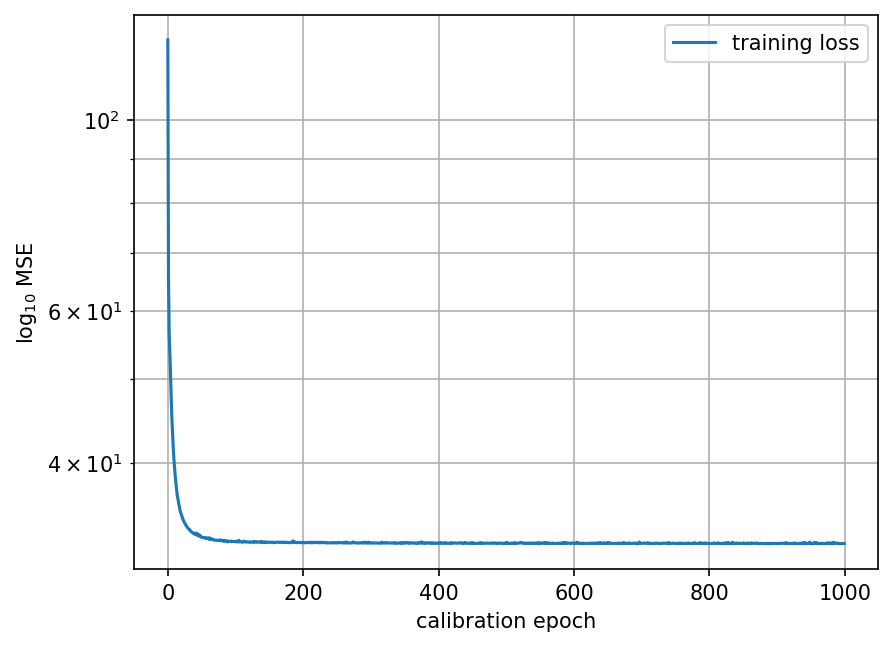

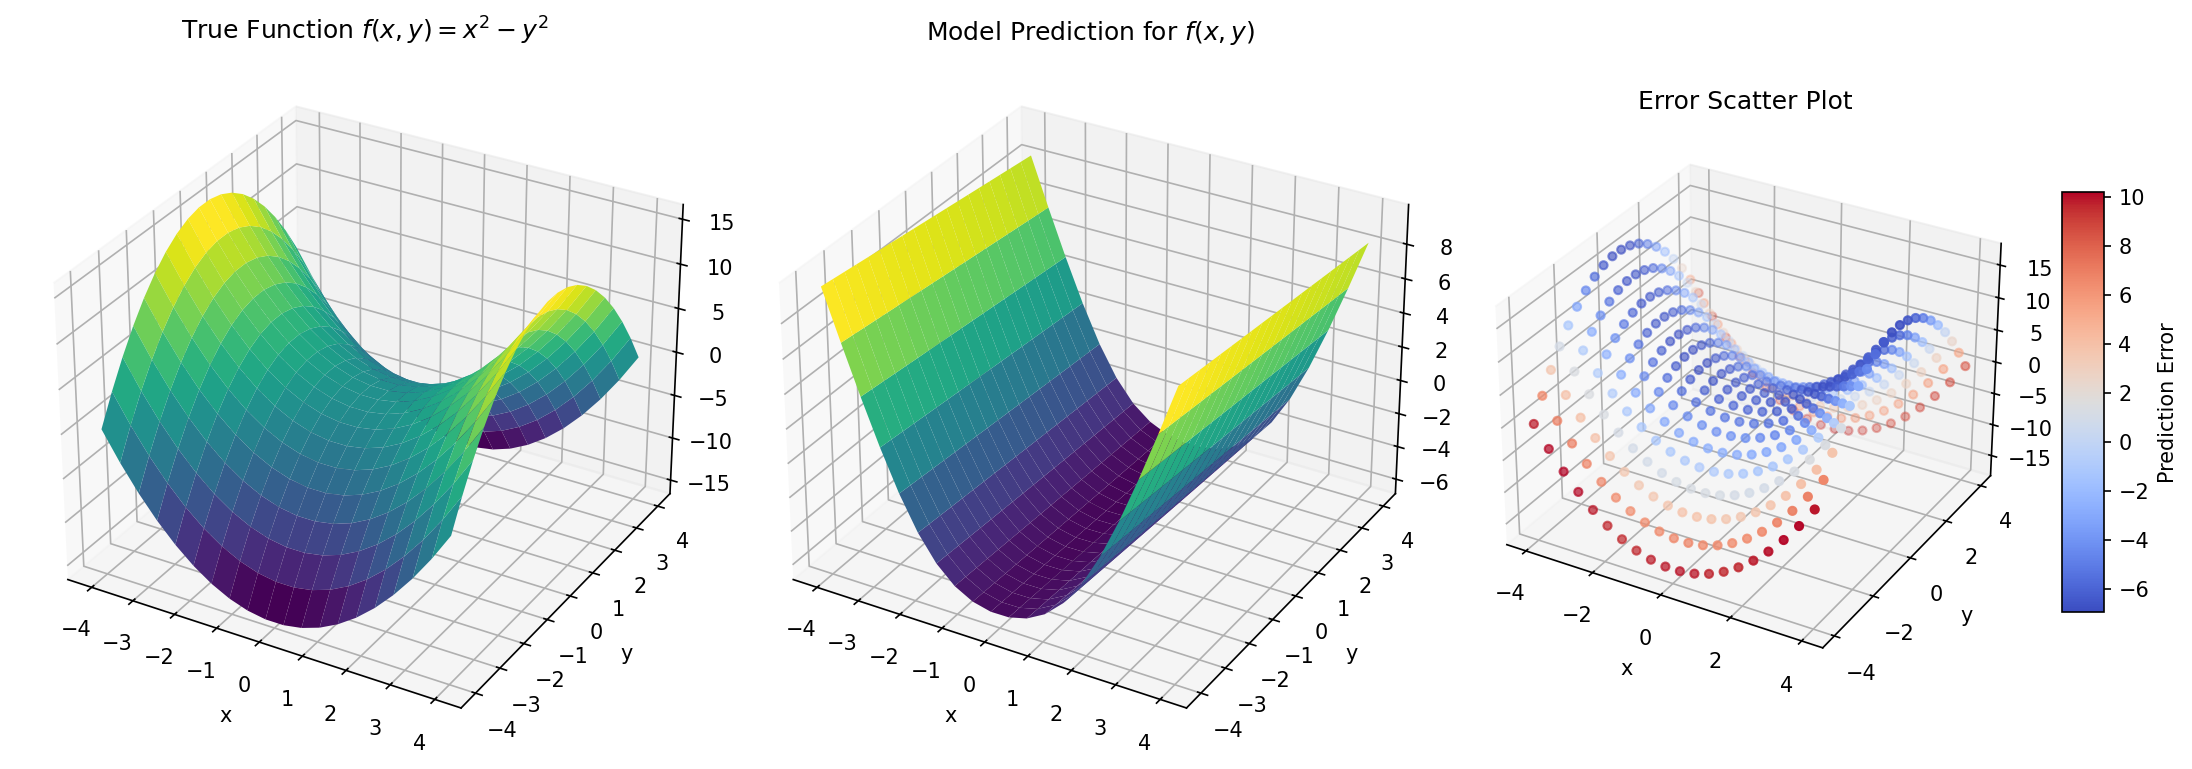

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

t1 = now()
print(t1)

model_icnn.optimizer.learning_rate.assign(0.002)
h = model_icnn.fit(xs_c_1, ys_c_1, epochs=2000,verbose = 2)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

# plot some results
plt.figure(1, dpi=150)
plt.semilogy(h.history['loss'], label='training loss')
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('log$_{10}$ MSE')
plt.legend()

fig = plt.figure(figsize=(15, 5), dpi=150)


ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(x_grid_1, y_grid_1, ys_1.numpy().reshape(x_grid_1.shape), cmap='viridis')
ax1.set_title('True Function $f(x, y) = x^2 - y^2$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('$f(x, y)$')


ax2 = fig.add_subplot(1, 3, 2, projection='3d')
predicted_ys = model_icnn.predict(xs_1)
predicted_grid = predicted_ys.reshape(x_grid_1.shape)
ax2.plot_surface(x_grid_1, y_grid_1, predicted_grid, cmap='viridis')
ax2.set_title('Model Prediction for $f(x, y)$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('$f(x, y)$')


ax3 = fig.add_subplot(1, 3, 3, projection='3d')
predicted_ys = predicted_ys.flatten()
true_ys = ys_1.numpy().flatten()
errors = predicted_ys - true_ys


scatter = ax3.scatter(xs_1[:, 0], xs_1[:, 1], true_ys, c=errors, cmap='coolwarm', s=15)
ax3.set_title('Error Scatter Plot')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('True $f(x, y)$')


cbar = fig.colorbar(scatter, ax=ax3, shrink=0.6, aspect=10)
cbar.set_label('Prediction Error')


plt.tight_layout()
plt.show()


### Model calibration for f2

2024-11-04 12:25:27.666397
Epoch 1/1000
10/10 - 0s - loss: 96.6414 - 41ms/epoch - 4ms/step
Epoch 2/1000
10/10 - 0s - loss: 63.0380 - 44ms/epoch - 4ms/step
Epoch 3/1000
10/10 - 0s - loss: 43.8468 - 46ms/epoch - 5ms/step
Epoch 4/1000
10/10 - 0s - loss: 41.4200 - 47ms/epoch - 5ms/step
Epoch 5/1000
10/10 - 0s - loss: 39.0298 - 32ms/epoch - 3ms/step
Epoch 6/1000
10/10 - 0s - loss: 37.3806 - 28ms/epoch - 3ms/step
Epoch 7/1000
10/10 - 0s - loss: 36.1093 - 36ms/epoch - 4ms/step
Epoch 8/1000
10/10 - 0s - loss: 34.7222 - 30ms/epoch - 3ms/step
Epoch 9/1000
10/10 - 0s - loss: 33.4724 - 30ms/epoch - 3ms/step
Epoch 10/1000
10/10 - 0s - loss: 32.4115 - 36ms/epoch - 4ms/step
Epoch 11/1000
10/10 - 0s - loss: 31.2472 - 30ms/epoch - 3ms/step
Epoch 12/1000
10/10 - 0s - loss: 30.1839 - 29ms/epoch - 3ms/step
Epoch 13/1000
10/10 - 0s - loss: 29.1784 - 30ms/epoch - 3ms/step
Epoch 14/1000
10/10 - 0s - loss: 28.1767 - 32ms/epoch - 3ms/step
Epoch 15/1000
10/10 - 0s - loss: 27.2224 - 36ms/epoch - 4ms/step
Epoch 1

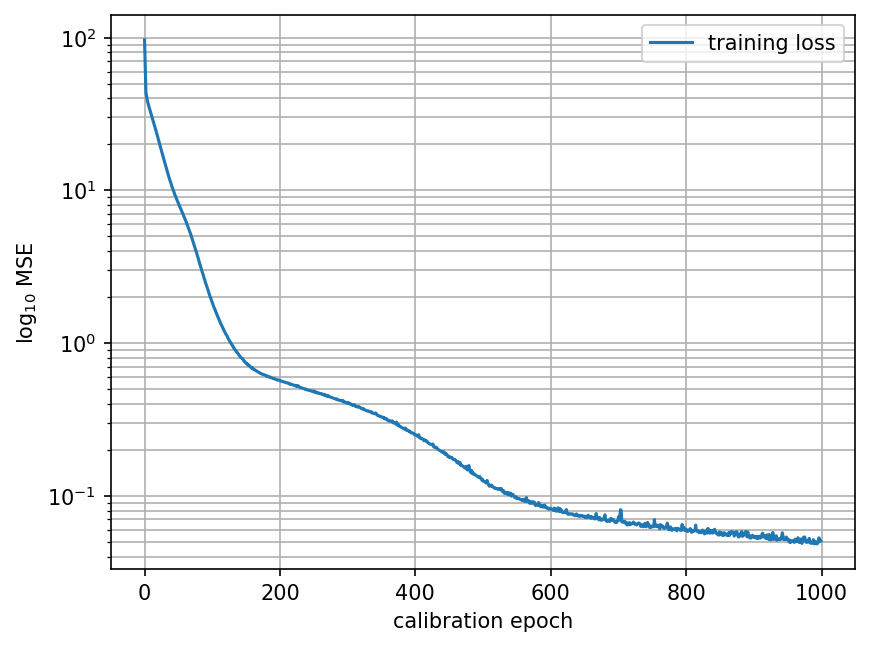

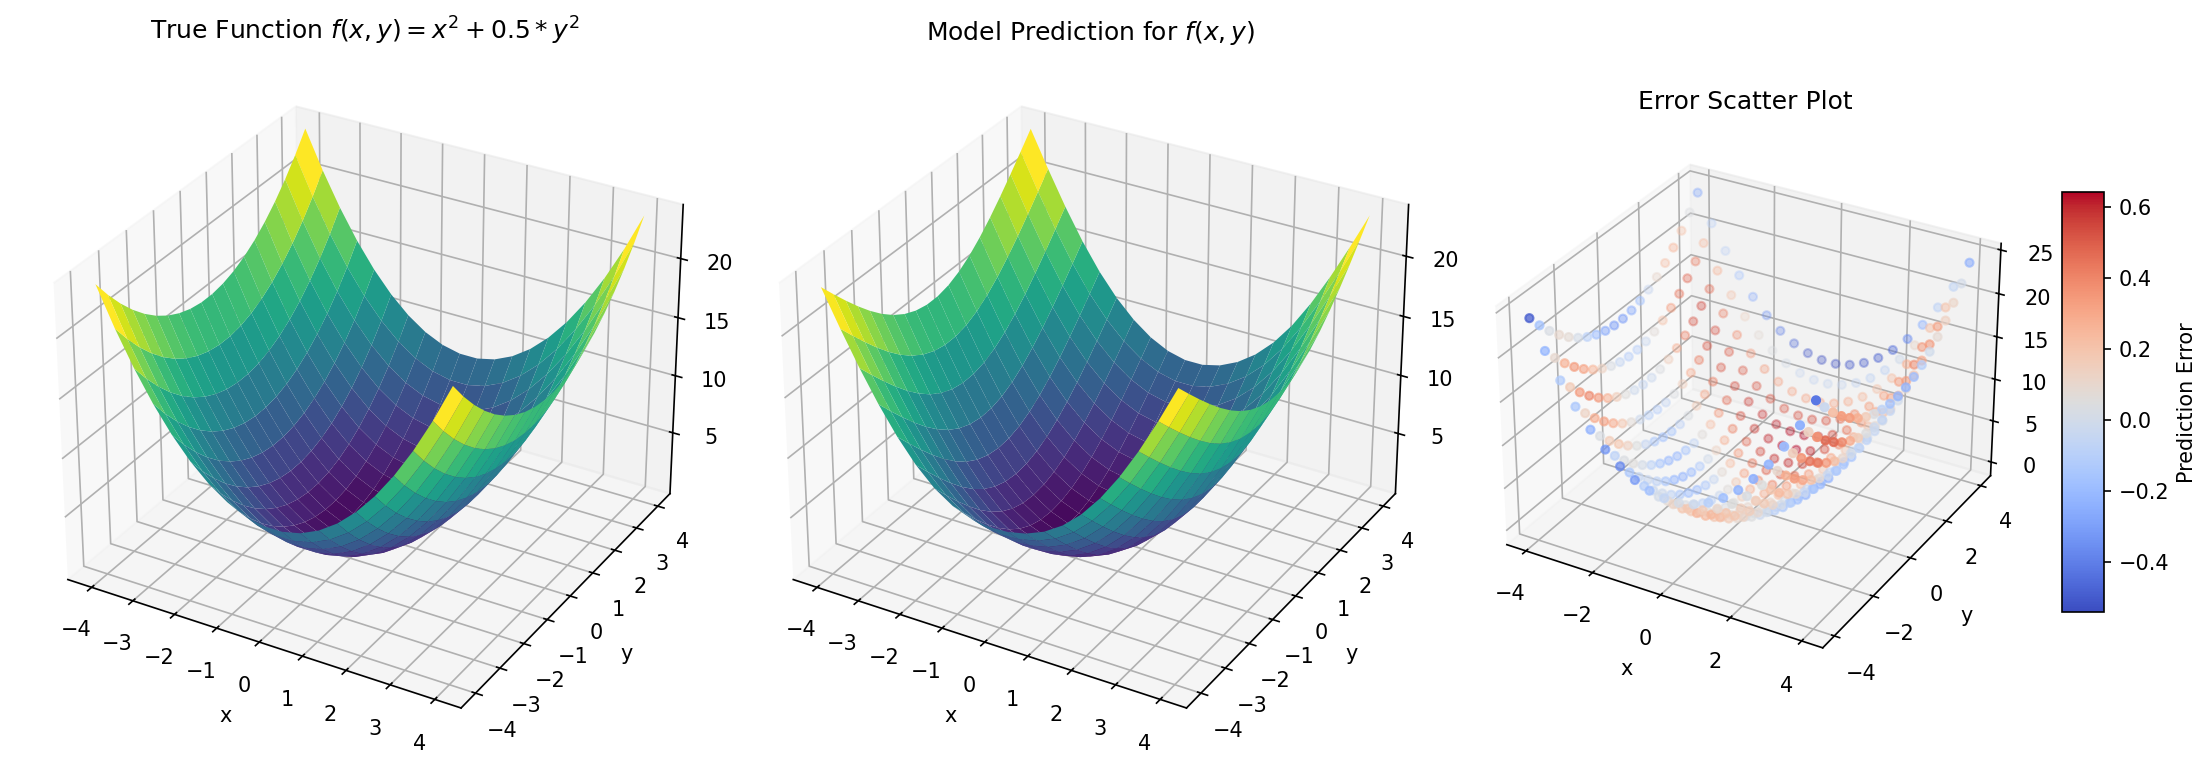

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

t1 = now()
print(t1)

model_icnn.optimizer.learning_rate.assign(0.002)
h = model_icnn.fit(xs_c_2, ys_c_2, epochs=1000,verbose = 2)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

# plot some results
plt.figure(1, dpi=150)
plt.semilogy(h.history['loss'], label='training loss')
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('log$_{10}$ MSE')
plt.legend()

fig = plt.figure(figsize=(15, 5), dpi=150)


ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(x_grid_2, y_grid_2, ys_2.numpy().reshape(x_grid_2.shape), cmap='viridis')
ax1.set_title('True Function $f(x, y) = x^2 + 0.5*y^2$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('$f(x, y)$')


ax2 = fig.add_subplot(1, 3, 2, projection='3d')
predicted_ys = model_icnn.predict(xs_2)
predicted_grid = predicted_ys.reshape(x_grid_2.shape)
ax2.plot_surface(x_grid_2, y_grid_2, predicted_grid, cmap='viridis')
ax2.set_title('Model Prediction for $f(x, y)$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('$f(x, y)$')


ax3 = fig.add_subplot(1, 3, 3, projection='3d')
predicted_ys = predicted_ys.flatten()
true_ys = ys_2.numpy().flatten()
errors = predicted_ys - true_ys


scatter = ax3.scatter(xs_2[:, 0], xs_2[:, 1], true_ys, c=errors, cmap='coolwarm', s=15)
ax3.set_title('Error Scatter Plot')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('True $f(x, y)$')


cbar = fig.colorbar(scatter, ax=ax3, shrink=0.6, aspect=10)
cbar.set_label('Prediction Error')


plt.tight_layout()
plt.show()
